# Part 1. Pitch & Problem Statement

## What are the Greenest Countries in the World, and why?

### What can be learnt from these Nations, if anything, that can be applied to other nations further behind?

Can we use data science techniques to predict and prescribe solutions for energy use in growing populations?

Knowing that energy consumption does not have a linear relationship with population size, can we use data science to find out why?

Can we then use this information to prescribe 'best practices' for growing nations so they can have the same standards of living as developed countries while allowing them to 'leapfrog' some of the known issues?

Using the dataset(s) provided by Yale https://epi.yale.edu/downloads, where they rank countries progress in this regard using the EPI, 'Environmental Performance index', with added data from World Bank group https://data.worldbank.org/ (for metrics like GDP and population size), can I predict EPI using GDP, Population and other variables to build some helpful data that can give us insight into the problem statement.

# Part 2. Dataset & Data Collection



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
import scipy.stats as stats
import statsmodels.api as sm
sns.set(font_scale=1.5)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Environmental performance index Abbreviations Explained and later re-used for column renaming
abb = pd.read_csv(
    '/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Datasets/epi2020indicator.csv')
abb.head()

,Type,Abbreviation,Variable,Short name,Order
0,EPI,EPI,Environmental Performance Index,EPI,1
1,PolicyObjective,HLT,Environmental Health,Health,2
2,IssueCategory,AIR,Air Quality,Air Quality,3
3,Indicator,PMD,PM2.5 exposure,PM2.5,4
4,Indicator,HAD,Household solid fuels,Household solid fuels,5


In [3]:
# Environmental performance index: Global metrics for the environment: Ranking country performance on sustainability issues
ep = pd.read_csv(
    '/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Datasets/epi2020results.csv')
ep.head()

,country,region,Population 2020,GDP Per Capita,EPI.new,HLT.new,AIR.new,PMD.new,HAD.new,OZD.new,...,LCB.rnk.new,GIB.rnk.new,GHP.rnk.new,APE.rnk.new,SDA.rnk.new,NXA.rnk.new,AGR.rnk.new,SNM.rnk.new,WRS.rnk.new,WWT.rnk.new
0,Afghanistan,Southern Asia,38928341,517,25.5,20.0,17.7,25.4,7.3,16.9,...,1.0,77,1,179,176,176,48,48,134,134
1,Angola,Sub-Saharan Africa,32866268,1776,29.7,20.4,26.8,32.6,17.8,34.4,...,136.0,67,78,176,174,176,123,123,134,134
2,Albania,Eastern Europe,2837743,5246,49.0,44.5,41.2,44.2,34.6,60.1,...,26.0,130,87,1,1,1,94,94,92,92
3,United Arab Emirates,Greater Middle East,9890400,36285,55.6,55.2,48.6,13.9,100.0,18.8,...,151.0,165,172,46,1,69,169,169,21,21
4,Argentina,Latin America & Caribbean,45376763,8579,52.2,60.2,56.9,54.7,60.9,48.7,...,67.0,132,132,88,89,90,2,2,77,77


# Part 3. EDA & Preliminary Analysis

Quantitatively describe and visualise your data.

In [4]:
# abb['Short name']
new_columns_dict = {
    'country':'Country', 
    'region':'Region',
    'Population 2020':'Population', 
    'GDP Per Capita':'GDP',
    'EPI.new':'EPI',
    'HLT.new':'Health',
    'AIR.new':'Air Quality',
    'PMD.new':'PM2.5',
    'HAD.new':'Household solid fuels',
    'OZD.new':'Ozone',
    'H2O.new':'Sanitation & Drinking Water',
    'USD.new':'Unsafe Sanitation',
    'UWD.new':'Unsafe Drinking water',
    'HMT.new':'Heavy Metals',
    'PBD.new':'Lead',
    'WMG.new':'Waste Management',
    'MSW.new':'Solid waste',
    'ECO.new':'Ecosystem Vitality',
    'BDH.new':'Biodiversity',
    'TBN.new':'Terrestrial biomes national',
    'TBG.new':'Terrestrial biomes global',
    'MPA.new':'Marine protected areas',
    'PAR.new':'Protected Areas Rep. Ind.',
    'SHI.new':'Species Habitat Index',
    'SPI.new':'Species Protection Index',
    'BHV.new':'Biodiversity Habitat Index',
    'ECS.new':'Ecosystem Services',
    'TCL.new':'Tree cover loss',
    'GRL.new':'Grassland loss',
    'WTL.new':'Wetland loss',
    'FSH.new':'Fisheries',
    'FSS.new':'Fish Stock Status',
    'RMS.new':'Marine Trophic Index',
    'FGT.new':'Fish caught by trawling',
    'CCH.new':'Climate Change',
    'CDA.new':'CO2 growth rate',
    'CHA.new':'CH4 growth rate',
    'FGA.new':'F-gas growth rate',
    'NDA.new':'N2O growth rate',
    'BCA.new':'Black Carbon growth rate',
    'LCB.new':'CO2 from land cover',
    'GIB.new':'GHG intensity trend',
    'GHP.new':'GHG per capita',
    'APE.new':'Pollution Emissions',
    'SDA.new':'SO2 growth rate',
    'NXA.new':'NOx growth rate',
    'AGR.new':'Agriculture',
    'SNM.new':'Sustainable N Mgmt Index',
    'WRS.new':'Water Resources',
    'WWT.new':'Wastewater treatment',
}

ep.rename(columns=new_columns_dict, inplace=True)

In [5]:
# Move predictor variable to the beginning
col = ep.pop('EPI')
ep.insert(0, col.name, col)
ep.head()
ep.to_csv('/Users/Marc/Documents/DataScience/GA/DSI21-projects/EPI/Datasets/ep.csv')

In [6]:
# ep['GDP'] = ep['GDP'].div(1000000)
# ep['GDP'] = ep['GDP'].round(2)
# ep['Population'] = ep['Population'].div(1000000)
# ep['Population'] = ep['Population'].round(2)

In [7]:
# ep.sort_values('EPI', ascending=False, inplace=True)

In [8]:
ep.head()

,EPI,Country,Region,Population,GDP,Health,Air Quality,PM2.5,Household solid fuels,Ozone,...,LCB.rnk.new,GIB.rnk.new,GHP.rnk.new,APE.rnk.new,SDA.rnk.new,NXA.rnk.new,AGR.rnk.new,SNM.rnk.new,WRS.rnk.new,WWT.rnk.new
0,25.5,Afghanistan,Southern Asia,38928341,517,20.0,17.7,25.4,7.3,16.9,...,1.0,77,1,179,176,176,48,48,134,134
1,29.7,Angola,Sub-Saharan Africa,32866268,1776,20.4,26.8,32.6,17.8,34.4,...,136.0,67,78,176,174,176,123,123,134,134
2,49.0,Albania,Eastern Europe,2837743,5246,44.5,41.2,44.2,34.6,60.1,...,26.0,130,87,1,1,1,94,94,92,92
3,55.6,United Arab Emirates,Greater Middle East,9890400,36285,55.2,48.6,13.9,100.0,18.8,...,151.0,165,172,46,1,69,169,169,21,21
4,52.2,Argentina,Latin America & Caribbean,45376763,8579,60.2,56.9,54.7,60.9,48.7,...,67.0,132,132,88,89,90,2,2,77,77


In [9]:
# Split this into the 3 sections of the data, the new(2020) data(e.g EPI.new), the change over 10 years (e.g. EPI.change), and the rank (e.g. EPI.rnk.new). 

# ***I'll initially be working on 2020 data***

In [10]:
# EPI 2020
epi = ep.iloc[:,0:50]

In [11]:
# EPI 10 year change
epic1 = ep.iloc[:,0:5]
epic2 = ep.iloc[:,50:96]
epic = epic1.join(epic2)

In [12]:
# EPI Rank
epirank1 = ep.iloc[:,0:5]
epirank2 = ep.iloc[:,96:141]
epir = epirank1.join(epirank2)

In [13]:
# Now for thorough EDA...

# Gives quick overview of which Countries have highest EPI

# epi.sort_values('GDP', ascending=False, inplace=True)

In [14]:
epi.head()

,EPI,Country,Region,Population,GDP,Health,Air Quality,PM2.5,Household solid fuels,Ozone,...,CO2 from land cover,GHG intensity trend,GHG per capita,Pollution Emissions,SO2 growth rate,NOx growth rate,Agriculture,Sustainable N Mgmt Index,Water Resources,Wastewater treatment
0,25.5,Afghanistan,Southern Asia,38928341,517,20.0,17.7,25.4,7.3,16.9,...,100.0,50.6,100.0,0.0,0.0,0.0,51.0,51.0,0.0,0.0
1,29.7,Angola,Sub-Saharan Africa,32866268,1776,20.4,26.8,32.6,17.8,34.4,...,27.2,53.9,60.3,2.6,5.2,0.0,29.3,29.3,0.0,0.0
2,49.0,Albania,Eastern Europe,2837743,5246,44.5,41.2,44.2,34.6,60.1,...,78.4,36.4,58.3,100.0,100.0,100.0,37.6,37.6,2.7,2.7
3,55.6,United Arab Emirates,Greater Middle East,9890400,36285,55.2,48.6,13.9,100.0,18.8,...,15.0,19.8,0.0,83.4,100.0,66.7,13.7,13.7,76.8,76.8
4,52.2,Argentina,Latin America & Caribbean,45376763,8579,60.2,56.9,54.7,60.9,48.7,...,57.8,36.2,29.8,59.3,67.3,51.3,78.4,78.4,5.9,5.9


In [15]:
# Know shape of dataset
epi.shape

(176, 50)

In [16]:
epi.columns

Index(['EPI', 'Country', 'Region', 'Population', 'GDP', 'Health',
       'Air Quality', 'PM2.5', 'Household solid fuels', 'Ozone',
       'Sanitation & Drinking Water', 'Unsafe Sanitation',
       'Unsafe Drinking water', 'Heavy Metals', 'Lead', 'Waste Management',
       'Solid waste', 'Ecosystem Vitality', 'Biodiversity',
       'Terrestrial biomes national', 'Terrestrial biomes global',
       'Marine protected areas', 'Protected Areas Rep. Ind.',
       'Species Habitat Index', 'Species Protection Index',
       'Biodiversity Habitat Index', 'Ecosystem Services', 'Tree cover loss',
       'Grassland loss', 'Wetland loss', 'Fisheries', 'Fish Stock Status',
       'Marine Trophic Index', 'Fish caught by trawling', 'Climate Change',
       'CO2 growth rate', 'CH4 growth rate', 'F-gas growth rate',
       'N2O growth rate', 'Black Carbon growth rate', 'CO2 from land cover',
       'GHG intensity trend', 'GHG per capita', 'Pollution Emissions',
       'SO2 growth rate', 'NOx growth rate

In [17]:
epi.dtypes

EPI                            float64
Country                         object
Region                          object
Population                       int64
GDP                              int64
Health                         float64
Air Quality                    float64
PM2.5                          float64
Household solid fuels          float64
Ozone                          float64
Sanitation & Drinking Water    float64
Unsafe Sanitation              float64
Unsafe Drinking water          float64
Heavy Metals                   float64
Lead                           float64
Waste Management               float64
Solid waste                    float64
Ecosystem Vitality             float64
Biodiversity                   float64
Terrestrial biomes national    float64
Terrestrial biomes global      float64
Marine protected areas         float64
Protected Areas Rep. Ind.      float64
Species Habitat Index          float64
Species Protection Index       float64
Biodiversity Habitat Inde

In [18]:
# Gives quick overview of EPI per country
epi[['EPI', 'Country']].head()

,EPI,Country
0,25.5,Afghanistan
1,29.7,Angola
2,49.0,Albania
3,55.6,United Arab Emirates
4,52.2,Argentina


In [19]:
# Gives quick overview of GDP
epi.sort_values('GDP', ascending=False, inplace=False)
epi.head()

,EPI,Country,Region,Population,GDP,Health,Air Quality,PM2.5,Household solid fuels,Ozone,...,CO2 from land cover,GHG intensity trend,GHG per capita,Pollution Emissions,SO2 growth rate,NOx growth rate,Agriculture,Sustainable N Mgmt Index,Water Resources,Wastewater treatment
0,25.5,Afghanistan,Southern Asia,38928341,517,20.0,17.7,25.4,7.3,16.9,...,100.0,50.6,100.0,0.0,0.0,0.0,51.0,51.0,0.0,0.0
1,29.7,Angola,Sub-Saharan Africa,32866268,1776,20.4,26.8,32.6,17.8,34.4,...,27.2,53.9,60.3,2.6,5.2,0.0,29.3,29.3,0.0,0.0
2,49.0,Albania,Eastern Europe,2837743,5246,44.5,41.2,44.2,34.6,60.1,...,78.4,36.4,58.3,100.0,100.0,100.0,37.6,37.6,2.7,2.7
3,55.6,United Arab Emirates,Greater Middle East,9890400,36285,55.2,48.6,13.9,100.0,18.8,...,15.0,19.8,0.0,83.4,100.0,66.7,13.7,13.7,76.8,76.8
4,52.2,Argentina,Latin America & Caribbean,45376763,8579,60.2,56.9,54.7,60.9,48.7,...,57.8,36.2,29.8,59.3,67.3,51.3,78.4,78.4,5.9,5.9


In [20]:
epi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EPI                          176 non-null    float64
 1   Country                      176 non-null    object 
 2   Region                       176 non-null    object 
 3   Population                   176 non-null    int64  
 4   GDP                          176 non-null    int64  
 5   Health                       176 non-null    float64
 6   Air Quality                  176 non-null    float64
 7   PM2.5                        176 non-null    float64
 8   Household solid fuels        176 non-null    float64
 9   Ozone                        176 non-null    float64
 10  Sanitation & Drinking Water  176 non-null    float64
 11  Unsafe Sanitation            176 non-null    float64
 12  Unsafe Drinking water        176 non-null    float64
 13  Heavy Metals        

In [21]:
epi.isnull().sum()

EPI                              0
Country                          0
Region                           0
Population                       0
GDP                              0
Health                           0
Air Quality                      0
PM2.5                            0
Household solid fuels            0
Ozone                            0
Sanitation & Drinking Water      0
Unsafe Sanitation                0
Unsafe Drinking water            0
Heavy Metals                     0
Lead                             0
Waste Management                 0
Solid waste                      0
Ecosystem Vitality               0
Biodiversity                     0
Terrestrial biomes national      0
Terrestrial biomes global        0
Marine protected areas          43
Protected Areas Rep. Ind.        0
Species Habitat Index           24
Species Protection Index        24
Biodiversity Habitat Index       0
Ecosystem Services               4
Tree cover loss                 12
Grassland loss      

As the many columns of environmental data we have are factored into the EPI score using weighting and aggregation...

https://epi.yale.edu/downloads/epi2020weights20200604.csv

... we can comfortably drop the columns that have missing values as they have already been factored into the score.

We can then focus on other possible predictors that have have an impact on the EPI

In [22]:
print(epi.shape)
epi = epi.dropna(axis=1, how='any')
print(epi.shape)

(176, 50)
(176, 37)


In [23]:
# This shows the correlation of all variables to the EPI

epi.corr().sort_values('EPI', ascending=False)

,EPI,Population,GDP,Health,Air Quality,PM2.5,Household solid fuels,Ozone,Sanitation & Drinking Water,Unsafe Sanitation,...,Black Carbon growth rate,GHG intensity trend,GHG per capita,Pollution Emissions,SO2 growth rate,NOx growth rate,Agriculture,Sustainable N Mgmt Index,Water Resources,Wastewater treatment
EPI,1.000000,-0.088416,0.797989,0.939378,0.886548,0.663350,0.850027,0.266475,0.915443,0.885503,...,0.561390,0.152587,-0.697718,0.728046,0.578908,0.725665,0.349069,0.349069,0.822353,0.822353
Health,0.939378,-0.074636,0.834596,1.000000,0.961203,0.725880,0.910160,0.351251,0.964191,0.941546,...,0.479412,0.054627,-0.712287,0.631249,0.514415,0.617133,0.258213,0.258213,0.807488,0.807488
Unsafe Drinking water,0.921150,-0.028185,0.792817,0.963767,0.866501,0.593163,0.881298,0.268153,0.992698,0.958687,...,0.489379,0.068336,-0.725379,0.633932,0.516506,0.619899,0.285153,0.285153,0.775600,0.775600
Sanitation & Drinking Water,0.915443,-0.034736,0.778425,0.964191,0.859227,0.561599,0.897741,0.276489,1.000000,0.985998,...,0.479632,0.056777,-0.751267,0.636139,0.525609,0.614942,0.268550,0.268550,0.765558,0.765558
Ecosystem Vitality,0.895579,-0.089490,0.604377,0.688747,0.627404,0.460778,0.616408,0.107874,0.684602,0.650732,...,0.565499,0.251923,-0.551059,0.720718,0.556988,0.733908,0.402684,0.402684,0.691133,0.691133
Air Quality,0.886548,-0.113927,0.832173,0.961203,1.000000,0.843067,0.863363,0.388434,0.859227,0.828494,...,0.436035,0.038231,-0.621255,0.572341,0.457086,0.568549,0.215050,0.215050,0.778326,0.778326
Unsafe Sanitation,0.885503,-0.042986,0.739897,0.941546,0.828494,0.504392,0.898936,0.281215,0.985998,1.000000,...,0.454626,0.039684,-0.768831,0.623717,0.525471,0.593073,0.239059,0.239059,0.733312,0.733312
Household solid fuels,0.850027,-0.059397,0.766640,0.910160,0.863363,0.459599,1.000000,0.268844,0.897741,0.898936,...,0.377580,0.076643,-0.767903,0.597199,0.469352,0.600446,0.184958,0.184958,0.754984,0.754984
Climate Change,0.822478,-0.002023,0.541901,0.701658,0.628369,0.406730,0.651362,0.311653,0.700081,0.681285,...,0.616480,0.269768,-0.518675,0.711669,0.539358,0.734827,0.287568,0.287568,0.597965,0.597965
Water Resources,0.822353,-0.035913,0.799198,0.807488,0.778326,0.584425,0.754984,0.102646,0.765558,0.733312,...,0.439651,0.146340,-0.596569,0.615525,0.529817,0.574489,0.335141,0.335141,1.000000,1.000000


As you can see from above, most of the individual environmental indicators are highly correlated to the EPI.

In a sense, the EPI contains the info for all of the environmental indicators. As such, what I'll do now is drop the 32 individual environmental indicators and just use the 11 issue categories (mentioned in the indicator sheet, and minus those with missing values) and add in the EPI change over 10 years, then the EPI rank.

In [24]:
ic = (abb[abb['Type'] == 'IssueCategory'])
ic

,Type,Abbreviation,Variable,Short name,Order
2,IssueCategory,AIR,Air Quality,Air Quality,3
6,IssueCategory,H2O,Sanitation & Drinking Water,Sanitation & Drinking Water,7
9,IssueCategory,HMT,Heavy Metals,Heavy Metals,10
11,IssueCategory,WMG,Waste Management,Waste Management,12
14,IssueCategory,BDH,Biodiversity & Habitat,Biodiversity,15
22,IssueCategory,ECS,Ecosystem Services,Ecosystem Services,23
26,IssueCategory,FSH,Fisheries,Fisheries,27
30,IssueCategory,CCH,Climate Change,Climate Change,31
39,IssueCategory,APE,Pollution Emissions,Pollution Emissions,40
42,IssueCategory,AGR,Agriculture,Agriculture,43


In [25]:
epi.columns

Index(['EPI', 'Country', 'Region', 'Population', 'GDP', 'Health',
       'Air Quality', 'PM2.5', 'Household solid fuels', 'Ozone',
       'Sanitation & Drinking Water', 'Unsafe Sanitation',
       'Unsafe Drinking water', 'Heavy Metals', 'Lead', 'Waste Management',
       'Solid waste', 'Ecosystem Vitality', 'Biodiversity',
       'Terrestrial biomes national', 'Terrestrial biomes global',
       'Protected Areas Rep. Ind.', 'Biodiversity Habitat Index',
       'Climate Change', 'CO2 growth rate', 'CH4 growth rate',
       'N2O growth rate', 'Black Carbon growth rate', 'GHG intensity trend',
       'GHG per capita', 'Pollution Emissions', 'SO2 growth rate',
       'NOx growth rate', 'Agriculture', 'Sustainable N Mgmt Index',
       'Water Resources', 'Wastewater treatment'],
      dtype='object')

In [26]:
epi = epi.drop(columns=["Health", "PM2.5", "Household solid fuels", "Ozone", "Unsafe Sanitation",
               "Unsafe Drinking water", 'Lead', 'Solid waste', 'Ecosystem Vitality', 'Terrestrial biomes national', 'Terrestrial biomes global',
       'Protected Areas Rep. Ind.', 'Biodiversity Habitat Index', 'CO2 growth rate', 'CH4 growth rate',
       'N2O growth rate', 'Black Carbon growth rate', 'GHG intensity trend',
       'GHG per capita', 'SO2 growth rate',
       'NOx growth rate', 'Agriculture','Sustainable N Mgmt Index','Wastewater treatment'])
epi.head()

,EPI,Country,Region,Population,GDP,Air Quality,Sanitation & Drinking Water,Heavy Metals,Waste Management,Biodiversity,Climate Change,Pollution Emissions,Water Resources
0,25.5,Afghanistan,Southern Asia,38928341,517,17.7,28.0,0.0,0.0,21.9,22.2,0.0,0.0
1,29.7,Angola,Sub-Saharan Africa,32866268,1776,26.8,12.8,37.3,0.0,39.3,49.0,2.6,0.0
2,49.0,Albania,Eastern Europe,2837743,5246,41.2,54.0,46.1,0.0,68.2,56.8,100.0,2.7
3,55.6,United Arab Emirates,Greater Middle East,9890400,36285,48.6,67.2,54.3,26.8,80.9,38.9,83.4,76.8
4,52.2,Argentina,Latin America & Caribbean,45376763,8579,56.9,64.7,73.1,44.6,49.1,60.2,59.3,5.9


In [27]:
epi = epi.join(epic["EPI.change"])
epi = epi.join(epir["EPI.rnk.new"])

In [28]:
# Move EPI change variable to the beginning
col = epi.pop("EPI.change")
epi.insert(1, col.name, col)

In [29]:
# Move EPI rank variable to the beginning
col = epi.pop("EPI.rnk.new")
epi.insert(2, col.name, col)
epi.head()

,EPI,EPI.change,EPI.rnk.new,Country,Region,Population,GDP,Air Quality,Sanitation & Drinking Water,Heavy Metals,Waste Management,Biodiversity,Climate Change,Pollution Emissions,Water Resources
0,25.5,5.0,178,Afghanistan,Southern Asia,38928341,517,17.7,28.0,0.0,0.0,21.9,22.2,0.0,0.0
1,29.7,5.3,158,Angola,Sub-Saharan Africa,32866268,1776,26.8,12.8,37.3,0.0,39.3,49.0,2.6,0.0
2,49.0,10.2,62,Albania,Eastern Europe,2837743,5246,41.2,54.0,46.1,0.0,68.2,56.8,100.0,2.7
3,55.6,11.3,42,United Arab Emirates,Greater Middle East,9890400,36285,48.6,67.2,54.3,26.8,80.9,38.9,83.4,76.8
4,52.2,5.0,54,Argentina,Latin America & Caribbean,45376763,8579,56.9,64.7,73.1,44.6,49.1,60.2,59.3,5.9


In [30]:
epi.rename(columns={'EPI.change':'EPI Change', 'EPI.rnk.new':'EPI Rank'}, inplace=True)
epi.head()

,EPI,EPI Change,EPI Rank,Country,Region,Population,GDP,Air Quality,Sanitation & Drinking Water,Heavy Metals,Waste Management,Biodiversity,Climate Change,Pollution Emissions,Water Resources
0,25.5,5.0,178,Afghanistan,Southern Asia,38928341,517,17.7,28.0,0.0,0.0,21.9,22.2,0.0,0.0
1,29.7,5.3,158,Angola,Sub-Saharan Africa,32866268,1776,26.8,12.8,37.3,0.0,39.3,49.0,2.6,0.0
2,49.0,10.2,62,Albania,Eastern Europe,2837743,5246,41.2,54.0,46.1,0.0,68.2,56.8,100.0,2.7
3,55.6,11.3,42,United Arab Emirates,Greater Middle East,9890400,36285,48.6,67.2,54.3,26.8,80.9,38.9,83.4,76.8
4,52.2,5.0,54,Argentina,Latin America & Caribbean,45376763,8579,56.9,64.7,73.1,44.6,49.1,60.2,59.3,5.9


In [31]:
# This shows the correlation of all variables to the EPI. Now we have zero null values and all from EPI data are IssueCategories

epi.corr().sort_values('EPI', ascending=False)

,EPI,EPI Change,EPI Rank,Population,GDP,Air Quality,Sanitation & Drinking Water,Heavy Metals,Waste Management,Biodiversity,Climate Change,Pollution Emissions,Water Resources
EPI,1.000000,0.425994,-0.966070,-0.088416,0.797989,0.886548,0.915443,0.790854,0.803705,0.486947,0.822478,0.728046,0.822353
Sanitation & Drinking Water,0.915443,0.396605,-0.903061,-0.034736,0.778425,0.859227,1.000000,0.767922,0.784386,0.232031,0.700081,0.636139,0.765558
Air Quality,0.886548,0.288457,-0.830218,-0.113927,0.832173,1.000000,0.859227,0.807723,0.739620,0.311743,0.628369,0.572341,0.778326
Climate Change,0.822478,0.538974,-0.823980,-0.002023,0.541901,0.628369,0.700081,0.595381,0.701577,0.247365,1.000000,0.711669,0.597965
Water Resources,0.822353,0.294179,-0.733717,-0.035913,0.799198,0.778326,0.765558,0.724221,0.697752,0.347250,0.597965,0.615525,1.000000
Waste Management,0.803705,0.280535,-0.776410,-0.001475,0.647393,0.739620,0.784386,0.667436,1.000000,0.240407,0.701577,0.540791,0.697752
GDP,0.797989,0.255534,-0.694707,-0.034923,1.000000,0.832173,0.778425,0.723683,0.647393,0.291753,0.541901,0.544099,0.799198
Heavy Metals,0.790854,0.220296,-0.747816,-0.120777,0.723683,0.807723,0.767922,1.000000,0.667436,0.282500,0.595381,0.546830,0.724221
Pollution Emissions,0.728046,0.481872,-0.718305,-0.044233,0.544099,0.572341,0.636139,0.546830,0.540791,0.287085,0.711669,1.000000,0.615525
Biodiversity,0.486947,0.056685,-0.451967,-0.129909,0.291753,0.311743,0.232031,0.282500,0.240407,1.000000,0.247365,0.287085,0.347250


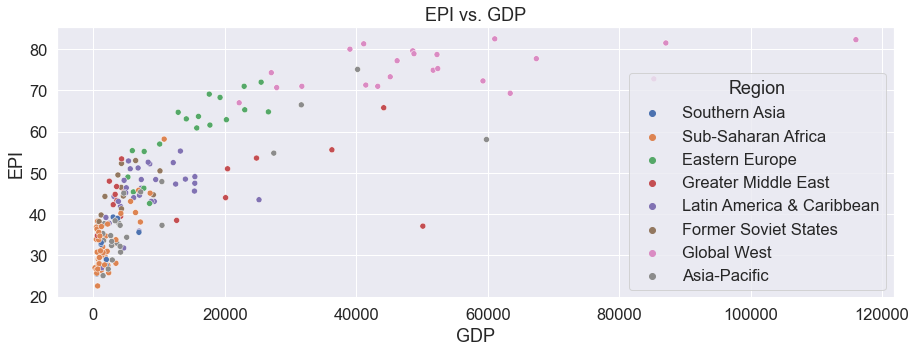

In [32]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
sns.scatterplot(y=epi.EPI, x=epi.GDP, hue=epi.Region)
plt.ylabel('EPI')
plt.xlabel('GDP')
plt.title("EPI vs. GDP")
plt.show()

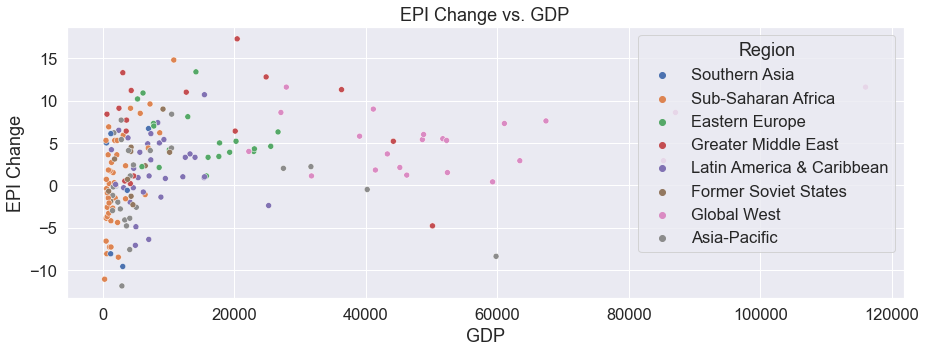

In [33]:
# Now lets visualise both the change and the rank vs GDP

fig = plt.figure(figsize=(15,5))
ax = fig.gca()
sns.scatterplot(y=epi['EPI Change'], x=epi.GDP, hue=epi.Region)
plt.ylabel('EPI Change')
plt.xlabel('GDP')
plt.title("EPI Change vs. GDP")
plt.show()

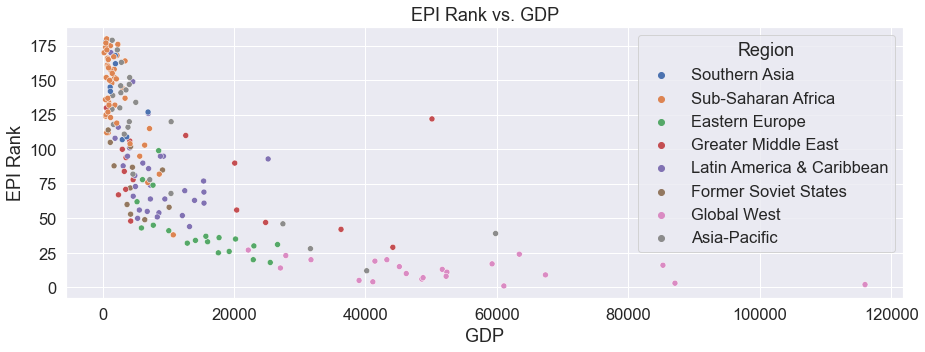

In [34]:
# Now lets visualise the rank vs GDP

fig = plt.figure(figsize=(15,5))
ax = fig.gca()
sns.scatterplot(y=epi['EPI Rank'], x=epi.GDP, hue=epi.Region)
plt.ylabel('EPI Rank')
plt.xlabel('GDP')
plt.title("EPI Rank vs. GDP")
plt.show()

# What Can We Take From This So Far?

As Pointed out by Yale themselves and as we can see from the data:

- There is a high correlation between a Countries wealth (GDP per capita in this case) and EPI score

- The Region (those being in the Global West faring the best), seems to have a positive correlation with EPI score, this is likely a further extension of Wealth

- And, perhaps unsurprisingly, we have a negative correlation between EPI score and population.

- In terms of the rank, its essentially the EPI in reverse i.e. lower rank is good vs lower EPI is bad.

- And lastly, the 10 year change shows the Global West has stayed neutral to positive, whereas the Middle East and Latine America show the most improvement

# Part 4: Findings & Technical Report

Share your technical findings with your fellow data scientists.

Explain your goals:

- As mentioned in the problem statement, can we use data to prescribe solutions being carried out by the environmentally more successful Coutries to the less successful Countries? And if not, why not? Already it is becoming clear a Countries Wealth plays a large part in how well they fare, can we find anything more specific than that?

Describe Modeling Choices:

- As the EPI score for 2020 is a continuous target variable, I'll be using regression models for this project.
- Starting with the below initial modelling, showing the linear regression and baseline for EPI vs GDP

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

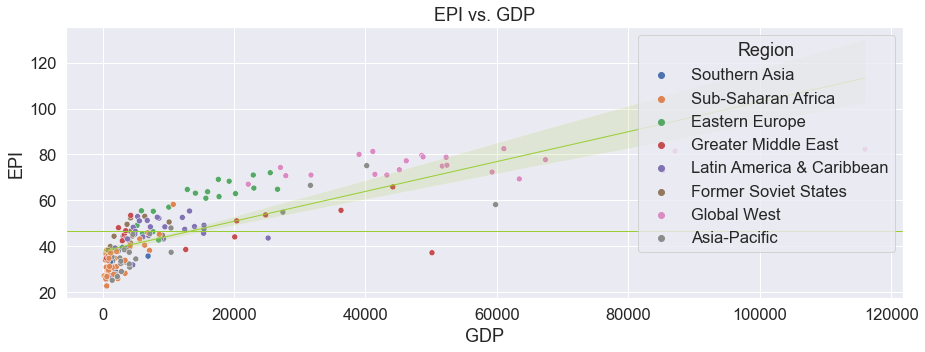

In [36]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
sns.scatterplot(y=epi.EPI, x=epi.GDP, hue=epi.Region, legend='auto')
sns.regplot(y=epi.EPI, x=epi.GDP, data=epi, ax=ax, color='yellowgreen', scatter=False, line_kws={'linewidth':1})
plt.axhline(epi['EPI'].mean(), color='yellowgreen', linewidth=1)
plt.ylabel('EPI')
plt.xlabel('GDP')
plt.title("EPI vs. GDP")
plt.show()

In [37]:
df = pd.DataFrame({'Y': epi.EPI, 'X': epi.GDP})

In [38]:
df.corr().loc['Y', 'X']

0.7979887073916735

In [39]:
def sls_fit_pd(df, X, Y):
    y_bar = df['Y'].mean()
    x_bar = df['X'].mean()
    std_y = df['Y'].std()
    std_x = df['X'].std()
    r_xy = df.corr().loc['X', 'Y']
    beta_1 = r_xy * (std_y / std_x)
    beta_0 = y_bar - beta_1*x_bar
    return beta_0, beta_1

In [40]:
# baseline
df['Mean_Yhat'] = df['Y'].mean()
df['Y'].mean()

46.46647727272729

In [41]:
# Calculate MSE
df['Mean_Yhat_SE'] = np.square(df['Y'] - df['Mean_Yhat'])
df['Mean_Yhat_SE'].mean()

240.54927395402868

In [42]:
# beta coefficients
beta_0, beta_1 = sls_fit_pd(df, 'Y', 'X')
beta_0, beta_1

(37.79108248116546, 0.0006514570860504083)

In [43]:
# predictions
df['Linear_Yhat'] = beta_0 + beta_1*df['X']
df['Linear_Yhat']

0      38.127886
1      38.948070
2      41.208626
3      61.429203
4      43.379933
         ...    
171    39.660764
172    40.441210
173    41.475724
174    38.432768
175    38.582603
Name: Linear_Yhat, Length: 176, dtype: float64

In [44]:
# MSE based on predictions
np.square(df['Y'] - df['Linear_Yhat']).mean()

87.37086949259141

In [45]:
np.square(df['Y'] - df['Linear_Yhat']).mean()**0.5

9.347238602528098

In [46]:
df.head()

,Y,X,Mean_Yhat,Mean_Yhat_SE,Linear_Yhat
0,25.5,517,46.466477,439.593169,38.127886
1,29.7,1776,46.466477,281.114760,38.948070
2,49.0,5246,46.466477,6.418737,41.208626
3,55.6,36285,46.466477,83.421237,61.429203
4,52.2,8579,46.466477,32.873283,43.379933


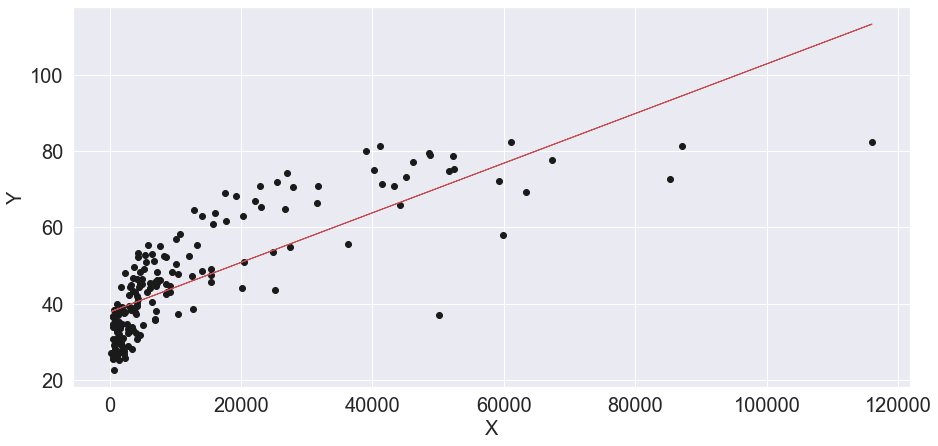

In [47]:
fig, ax = plt.subplots(figsize=(15, 7))

# plot a scatter plot on it with our data
ax.scatter(df['X'], df['Y'], c='k')
ax.plot(df['X'], df['Linear_Yhat'], color='r', lw=1)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

In [48]:
# residuals

residuals = df['Y'] - df['Linear_Yhat']
residuals

0     -12.627886
1      -9.248070
2       7.791374
3      -5.829203
4       8.820067
         ...    
171   -10.760764
172    -3.141210
173     1.624276
174    -3.732768
175    -1.582603
Length: 176, dtype: float64

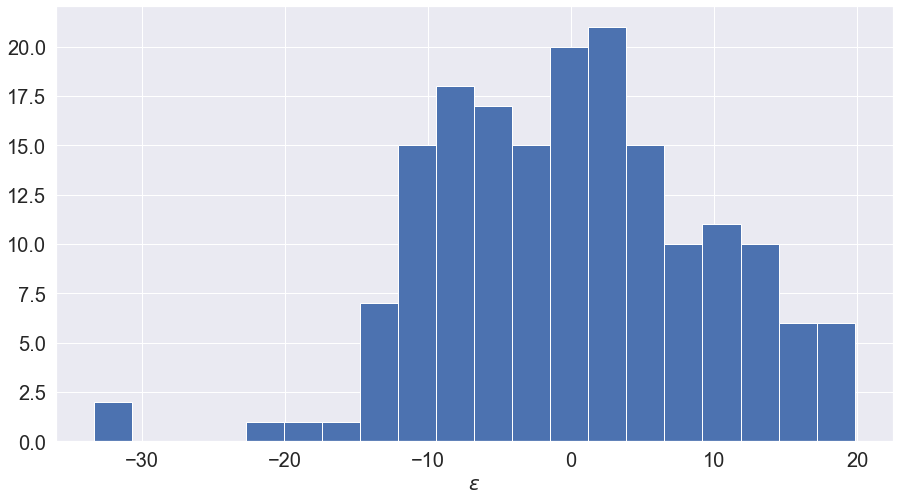

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.hist(residuals, bins=20, color='b')
ax.set_xlabel(r'$\epsilon$', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

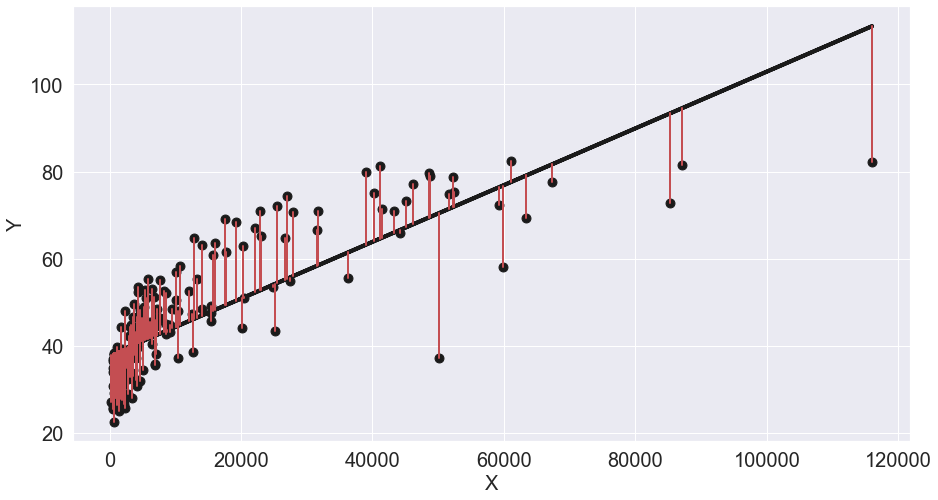

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.scatter(x=df['X'], y=df['Y'], c='k', s=80)
ax.plot(df['X'], df['Linear_Yhat'], color='k', lw=4)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
# iterate over predictions
for index, row in df.iterrows():
    ax.plot((row['X'], row['X']),
            (row['Y'], row['Linear_Yhat']), 'r-', lw=2)
ax.tick_params(axis='both', labelsize=20)

In [51]:
residuals.sum()

-2.7711166694643907e-12

In [52]:
residuals.dot(df.X)

-2.3748725652694702e-08

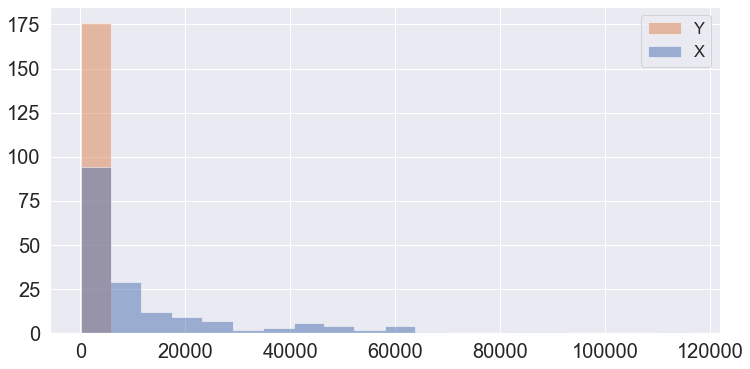

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(([df['X'], df['Y']]), label=['X', 'Y'], bins=20, histtype='stepfilled', alpha=0.5)
ax.legend()
ax.tick_params(axis='both', labelsize=20)

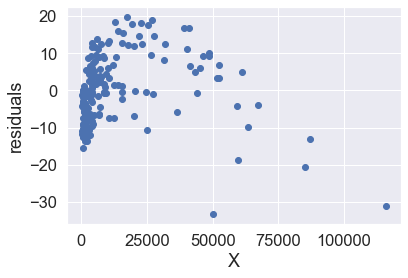

In [54]:
# check for dependence between predictor variable and residuals
plt.scatter(df['X'], residuals)
plt.xlabel('X')
plt.ylabel('residuals')
plt.show()

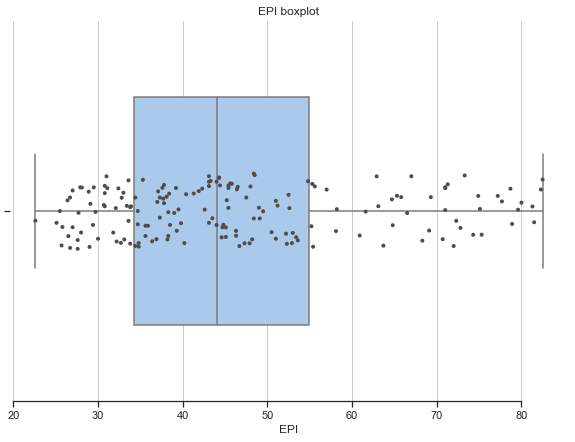

In [55]:
#boxplot of the sale price with the observations, to look at the outliers
sns.set_theme(style="ticks")
# Initialize the figure with
f, ax = plt.subplots(figsize=(10, 7))
# Plot the sale price with horizontal box
sns.boxplot(x="EPI", data=epi,
            whis=[0, 100], width=.6, palette="pastel")
# Add in points to show each observation
sns.stripplot(x="EPI",  data=epi,
              size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.set_title('EPI boxplot')
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)